<a href="https://colab.research.google.com/github/pietrodileo/Python_for_MD_thesis/blob/main/CreateSpectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plot a spectrogram from an audio signal

Creo un datastore di spettrogrammi, ottenendoli da dei segnali audio presenti su Google Drive

In [30]:
#importing the libraries
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pdb
import librosa
import librosa.display
from scipy.io import wavfile
import seaborn as sns
from pathlib import Path
import pylab

# Define local functions
def plotSignal(data,sample_rate):
  plt.figure(figsize=(14, 5))
  librosa.display.waveplot(data, sr=sample_rate)

def spectrogramPlot(x,sample_rate):
  #x: numpy array
  X = librosa.stft(x)
  #converting into energy levels(dB)
  Xdb = librosa.amplitude_to_db(abs(X))
  plt.figure(figsize=(20, 20))
  librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', 
                           y_axis='log',cmap='plasma')
  #plt.colorbar()
  plt.clim(-50,40)  # identical to caxis([-4,4]) in MATLAB
  plt.ylim([0, 10000])
  plt.axis('off')

Definisco le directory di input e di output

In [31]:
#let the plot appear and store it with the notebook
%matplotlib inline
#setting the path to the directory containing the pics
INPUT_DIR = '/content/drive/MyDrive/DatasetTesi/Vowel_E_REC'
OUTPUT_DIR = '/content/drive/MyDrive/DatasetTesi/outputSpectrogram/'
valid_formats = [".wav"]
audio_data = []

Creo uno spettrogramma per ogni file audio

In [32]:
# For every recording, make a spectogram and save it as label_speaker_no.png
if not os.path.exists(os.path.join(OUTPUT_DIR, 'audio-images')):
    os.makedirs(os.path.join(OUTPUT_DIR, 'audio-images'))

for folders in os.listdir(INPUT_DIR):
  # select a subfolder
  subfolder = os.path.join(INPUT_DIR,folders)
  # select all the records in the subfolder
  for filename in os.listdir(subfolder):
    file_format = os.path.splitext(filename)[1] 
    if file_format.lower() in valid_formats:
      data, sample_rate = librosa.load(os.path.join(subfolder,filename))
      file_path = os.path.join(subfolder, filename)
      file_stem = Path(subfolder).stem
      target_dir = f'class_{file_stem}'

      destination_dir = os.path.join(os.path.join(OUTPUT_DIR, 'audio-images'), target_dir)
      #if not os.path.exists(imageName + '.png'): #if we don't want to subscribe data
      if not os.path.exists(destination_dir):
        os.mkdir(destination_dir)
      # generate image name
      file_stem = Path(file_path).stem
      imageName = os.path.join(destination_dir, file_stem)

      # Plot the signal
      # plotSignal(data,sample_rate)
      # Plot Spectrogram
      spectrogramPlot(data,sample_rate)

      # save the plot
      pylab.savefig(f'{imageName}.png')
      pylab.close()

# MFCC

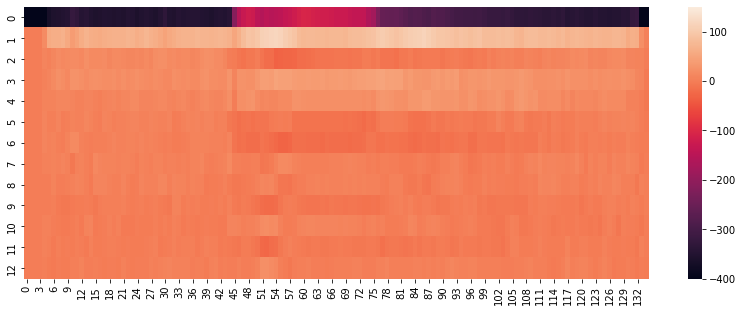

In [33]:
    # MFCC
    n_mfcc = 13
    n_mels = 40
    n_fft = 512 
    hop_length = 160
    fmin = 0
    fmax = None
    mfcc_librosa = librosa.feature.mfcc(y=data, sr=sample_rate, n_fft=n_fft,
                                    n_mfcc=n_mfcc, n_mels=n_mels,
                                    hop_length=hop_length,
                                    fmin=fmin, fmax=fmax, htk=False)
    plt.figure(figsize=(14, 5))
    sns.heatmap(mfcc_librosa, vmin=-400, vmax=150)

# Periodogram

# CNN